In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score,classification_report

In [2]:
df= pd.read_csv("./data/car_dataset.csv")

In [3]:
df.shape

(10620, 12)

In [4]:
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company,mileage,seats
0,0,800 ac,2007,60000,70000,Petrol,Individual,Manual,First Owner,maruti,16.10,5
1,1,wagon r,2007,135000,50000,Petrol,Individual,Manual,First Owner,maruti,20.51,5
2,2,verna,2012,600000,100000,Diesel,Individual,Manual,First Owner,hyundai,22.32,5
3,4,amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner,honda,25.80,5
4,6,xcent,2016,550000,25000,Petrol,Individual,Manual,First Owner,hyundai,25.40,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10620 entries, 0 to 10619
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10620 non-null  int64  
 1   name           10620 non-null  object 
 2   year           10620 non-null  int64  
 3   selling_price  10620 non-null  int64  
 4   km_driven      10620 non-null  int64  
 5   fuel           10620 non-null  object 
 6   seller_type    10620 non-null  object 
 7   transmission   10620 non-null  object 
 8   owner          10620 non-null  object 
 9   company        10620 non-null  object 
 10  mileage        10620 non-null  float64
 11  seats          10620 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 995.8+ KB


In [6]:
df.isnull().sum()

Unnamed: 0       0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
company          0
mileage          0
seats            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [99]:

func = FunctionTransformer(func=np.log1p) 
df["selling_price"] = func.transform(df["selling_price"])

<Axes: >

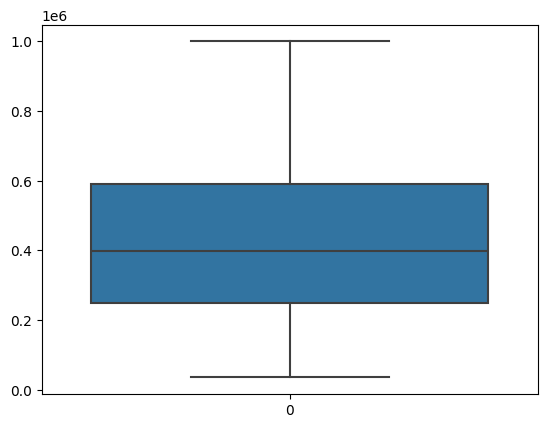

In [16]:
sns.boxplot(df["selling_price"])

<Axes: >

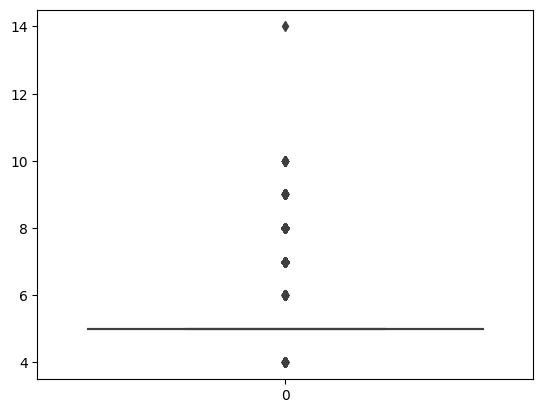

In [58]:
sns.boxplot(df["seats"])

In [54]:
df = df[df["selling_price"] < 1000000]
df = df[df["km_driven"] < 175000]

df = df[df["mileage"] > 10]
df = df[df["mileage"] < 35]

In [72]:
def add_others(feature_name, threshold):
    counts = df[feature_name].value_counts()
    unique = df[feature_name].nunique()

    repl = counts[counts <= threshold].index
    df[feature_name] = df[feature_name].replace(repl,'others')


add_others("company",50)
add_others("name",20) 

In [75]:
df.shape

(9190, 12)

In [76]:

func = FunctionTransformer(func=np.log1p) 
df["selling_price"] = func.transform(df["selling_price"])


In [81]:
X = df.drop(columns=["selling_price", "Unnamed: 0"])

Y = df["selling_price"]

In [82]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [88]:
x_train

,name,year,km_driven,fuel,seller_type,transmission,owner,company,mileage,seats
5955,accent,2011,70000,Petrol,Individual,Manual,First Owner,hyundai,16.36,5
5987,zest,2015,35000,Diesel,Individual,Manual,First Owner,tata,23.00,5
2146,amaze,2018,20000,Diesel,Individual,Manual,First Owner,honda,19.50,5
7762,duster,2014,120000,Diesel,Individual,Manual,First Owner,renault,20.45,5
1683,figo,2011,100000,Diesel,Individual,Manual,Second Owner,ford,20.00,5
...,...,...,...,...,...,...,...,...,...,...
6363,800 ac,2013,50000,Petrol,Individual,Manual,Second Owner,maruti,16.10,4
5759,bolero,2014,120000,Diesel,Individual,Manual,Third Owner,mahindra,15.96,7
5981,new safari,2012,90000,Diesel,Individual,Manual,First Owner,tata,13.93,7
940,manza,2012,120000,Diesel,Individual,Manual,First Owner,tata,21.12,5


In [89]:
encode_data  = ColumnTransformer(remainder="passthrough", transformers=[
    ("encode_data",OneHotEncoder(sparse_output=False, dtype="int32",drop="first") , [0,3,4,5,6,7])
])


In [117]:
lr = LinearRegression() 


pipe= Pipeline([
    ("encode_data",encode_data),
    ("model",lr)
])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

In [118]:
print("R2 Score", r2_score(y_true=y_test, y_pred=y_pred) * 100)
print("MAE " , mean_absolute_error(y_pred=y_pred, y_true=y_test)) 

R2 Score 86.92285413959272
MAE  0.16389524076877118


In [99]:
df.iloc[10]

Unnamed: 0                 15
name                    enjoy
year                     2013
selling_price       12.873905
km_driven               33000
fuel                   Diesel
seller_type        Individual
transmission           Manual
owner            Second Owner
company             chevrolet
mileage                  18.2
seats                       7
Name: 11, dtype: object

In [108]:
input_data = {
    'name': ['enjoy'],
    'company': ['chevrolet'],
    'year': [2013],
    'km_driven': [33000],
    'fuel': ['Diesel'],
    'transmission': ['Manual'],
    'owner': ['Second Owner'],
    'seller_type':"Individual",
    'seats':7,
    'mileage':18.5
} 


print("Acutal Price" , np.expm1(12.873905))
input_df = pd.DataFrame(input_data) 
res = pipe.predict(input_df)
np.expm1(res)


Acutal Price 390000.1629404607


array([342580.25810644])